## Just Gear2/Segment2 data(skate_without_video)

In [1]:
# import statements

import pandas as pd
import numpy as np
from matplotlib import pyplot
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from pandas import Series

from keras.models import Sequential
from keras.layers import Dense, LSTM


/Users/nickeylawrence/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
# Read the data

X = pd.read_csv('./Gear2/segment2.csv', parse_dates=['t'], index_col='t');
Y = np.full((X.shape[0],1), 2)
features = list(X.columns);

print('Data :', X.shape)
print('Class : ', Y.shape)

Data : (1367, 20)
Class :  (1367, 1)


In [3]:
# Create dataframe 

df = pd.DataFrame(data=X);
# indexFrame = pd.DataFrame(data=df.index)
# Y = pd.concat([indexFrame, pd.DataFrame(data=Y)], axis=1);
# Y.set_index(['t'])
Y = pd.DataFrame(data=Y);
df = df.assign(Y=Y.values);
print(df.head());


       fL   thL    w1L    w2L    w3L   a1L   a2L   a3L   fR   thR ...    w2R  \
t                                                                 ...          
0.00  0.1  51.6  0.193  0.321  0.015  2.90 -6.44 -5.81  0.2  36.4 ...  4.553   
0.02  0.2  51.8  0.205  0.196 -0.028  3.19 -6.65 -5.96  0.1  36.9 ...  3.947   
0.04  0.1  52.0  0.206  0.185 -0.056  3.38 -6.72 -6.13  0.1  37.0 ...  3.201   
0.06  0.2  52.1  0.183  0.256 -0.066  3.32 -6.60 -6.05  0.1  36.8 ...  2.655   
0.08  0.2  52.2  0.125  0.224 -0.090  2.98 -6.39 -5.56  0.1  36.3 ...  2.355   

        w3R   a1R   a2R   a3R    x    y     v   vdir  Y  
t                                                        
0.00  1.404  2.89 -5.34 -7.04  5.3  6.7  0.64  127.0  2  
0.02  1.344  1.03 -5.38 -5.09  5.3  6.6  0.64  127.1  2  
0.04  1.258 -0.24 -5.43 -2.84  5.4  6.6  0.64  127.1  2  
0.06  1.171 -0.76 -5.51 -0.51  5.4  6.6  0.64  127.1  2  
0.08  1.108 -1.35 -5.04  1.89  5.4  6.6  0.64  127.1  2  

[5 rows x 21 columns]


20 Features :  ['fL', 'thL', 'w1L', 'w2L', 'w3L', 'a1L', 'a2L', 'a3L', 'fR', 'thR', 'w1R', 'w2R', 'w3R', 'a1R', 'a2R', 'a3R', 'x', 'y', 'v', 'vdir']
Histogram


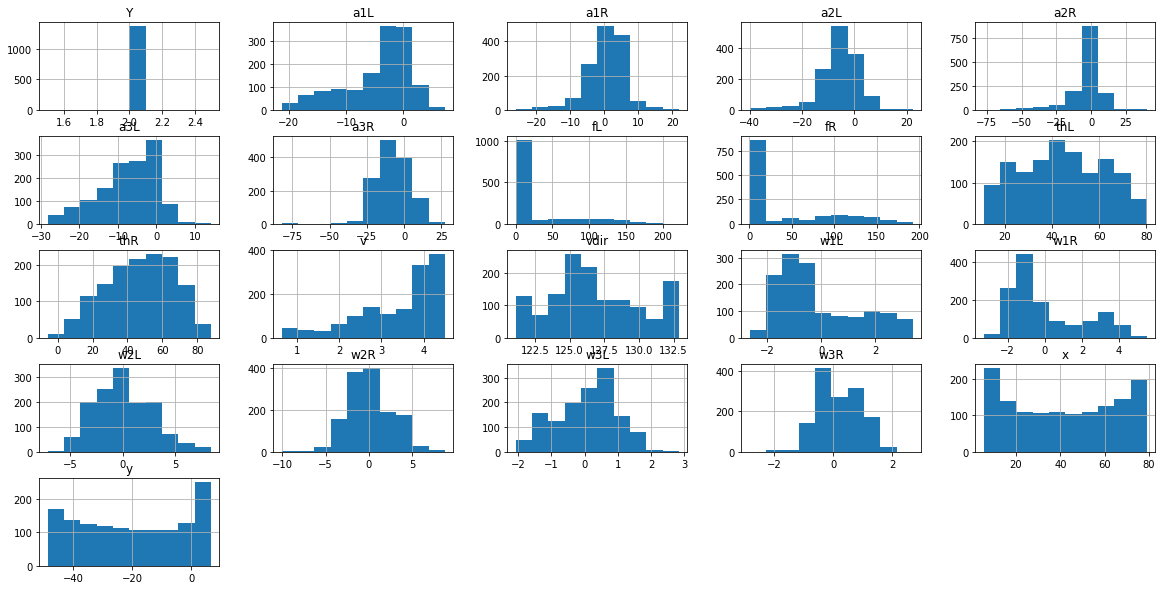

[[1.000e-01 5.160e+01 1.930e-01 ... 6.400e-01 1.270e+02 2.000e+00]
 [2.000e-01 5.180e+01 2.050e-01 ... 6.400e-01 1.271e+02 2.000e+00]
 [1.000e-01 5.200e+01 2.060e-01 ... 6.400e-01 1.271e+02 2.000e+00]
 ...
 [1.000e-01 4.430e+01 1.252e+00 ... 2.040e+00 1.327e+02 2.000e+00]
 [1.000e-01 4.570e+01 1.241e+00 ... 2.030e+00 1.327e+02 2.000e+00]
 [2.000e-01 4.700e+01 1.414e+00 ... 2.020e+00 1.326e+02 2.000e+00]]
Plotting each feature(column)


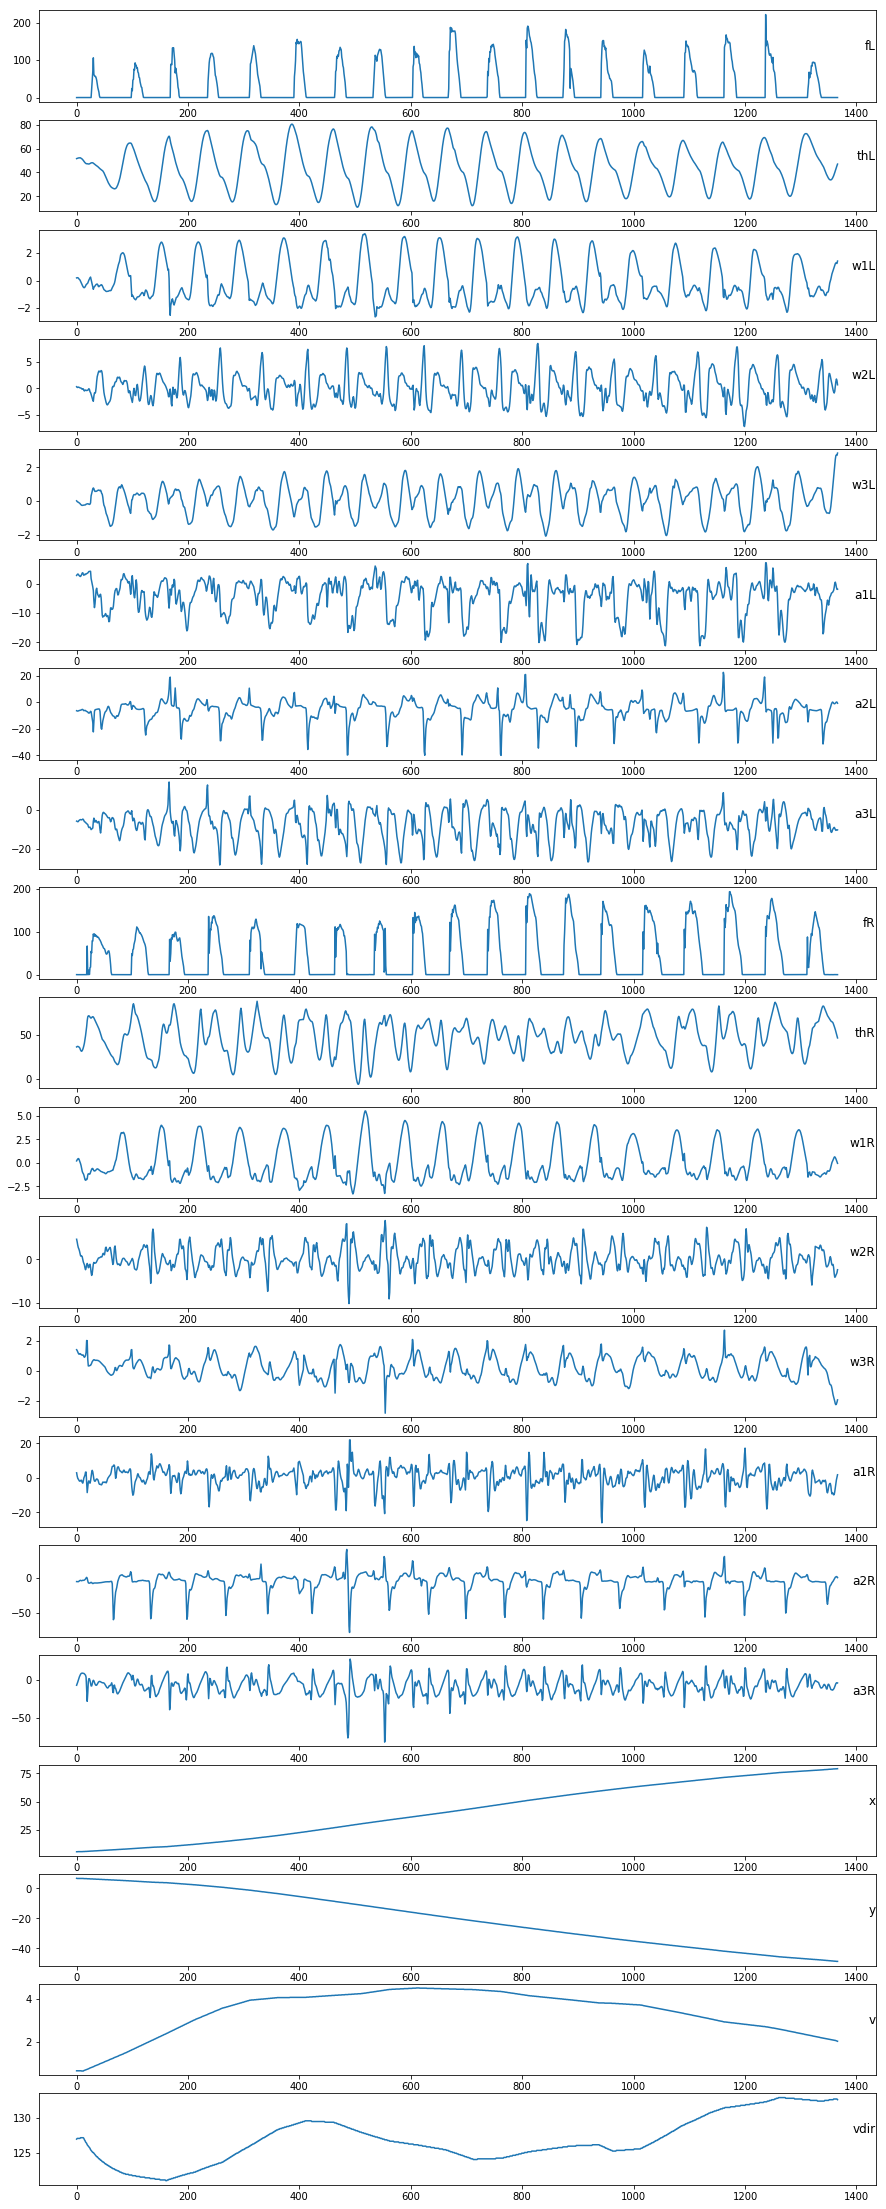

In [4]:
# Visualization
print('20 Features : ', features)

# Histogram
print('Histogram');
df.hist(figsize = (20,10));
pyplot.show()

# specify columns to plot
groups = [i for i in range(20)];
values = df.values;
print(values)
i = 1
# plot each column
print('Plotting each feature(column)');
pyplot.figure(figsize = (15,40))
for group in groups:
	pyplot.subplot(len(groups), 1, i)
	pyplot.plot(values[:, group])
	pyplot.title(df.columns[group], y=0.5, loc='right')
	i += 1
pyplot.show()

Scaling feature :  fL
----------------------------
Before :


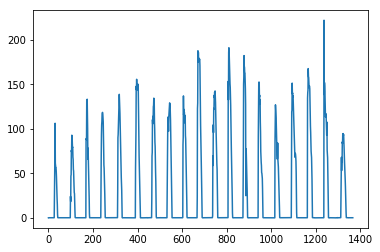

After :


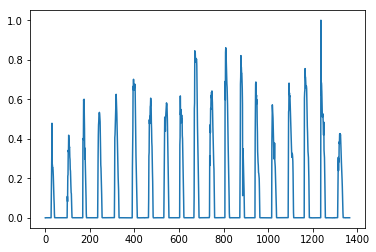

Scaling feature :  thL
----------------------------
Before :


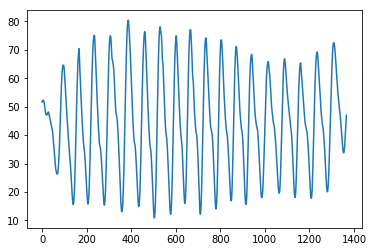

After :


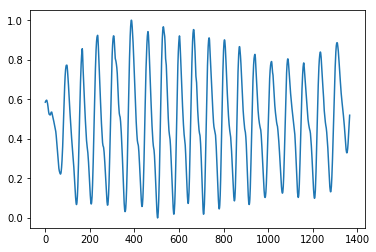

Scaling feature :  w1L
----------------------------
Before :


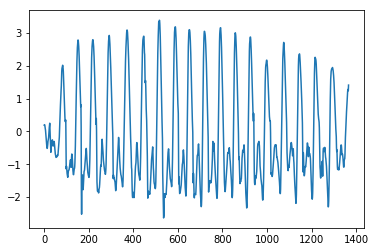

After :


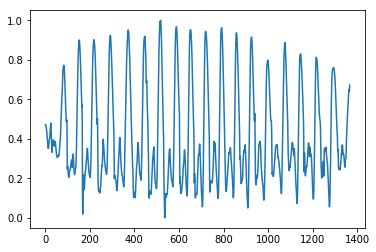

Scaling feature :  w2L
----------------------------
Before :


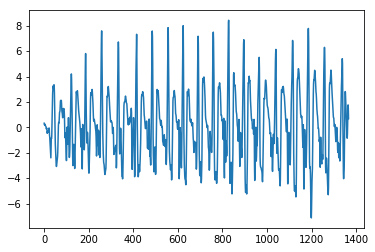

After :


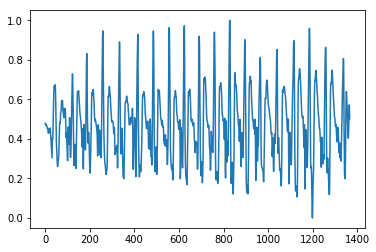

Scaling feature :  w3L
----------------------------
Before :


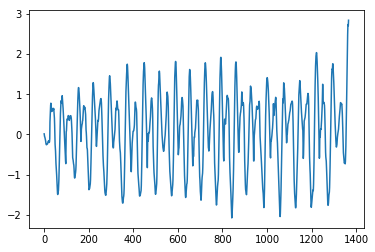

After :


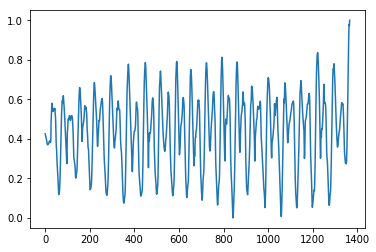

Scaling feature :  a1L
----------------------------
Before :


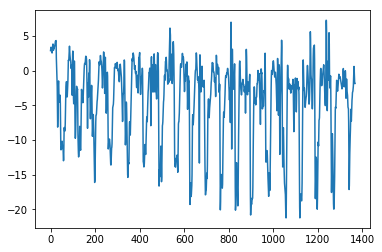

After :


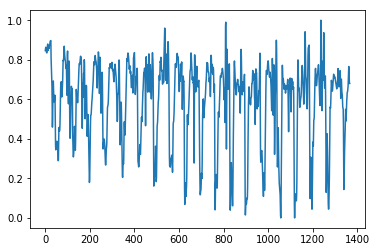

Scaling feature :  a2L
----------------------------
Before :


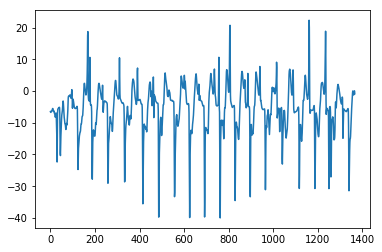

After :


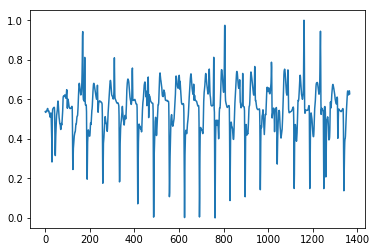

Scaling feature :  a3L
----------------------------
Before :


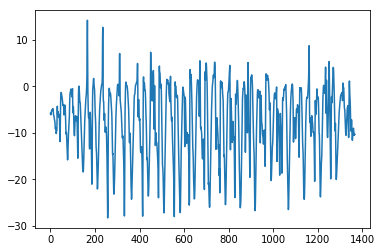

After :


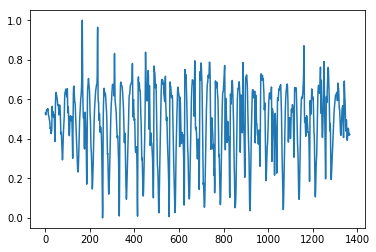

Scaling feature :  fR
----------------------------
Before :


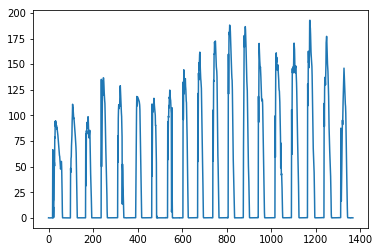

After :


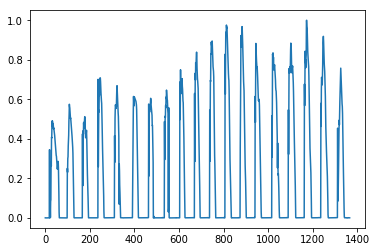

Scaling feature :  thR
----------------------------
Before :


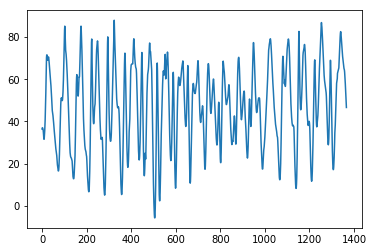

After :


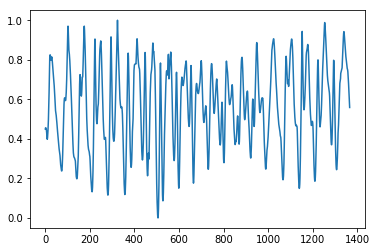

Scaling feature :  w1R
----------------------------
Before :


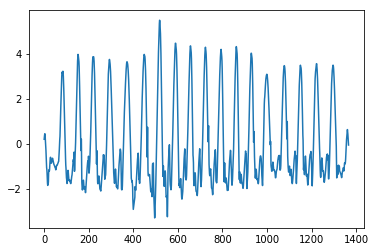

After :


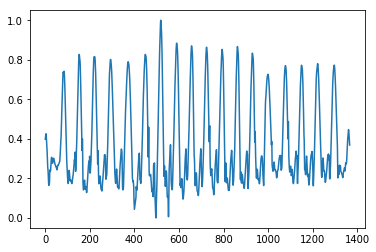

Scaling feature :  w2R
----------------------------
Before :


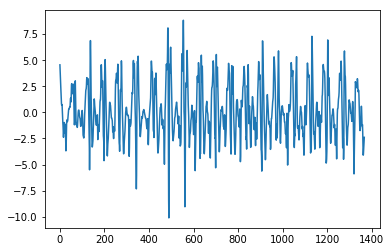

After :


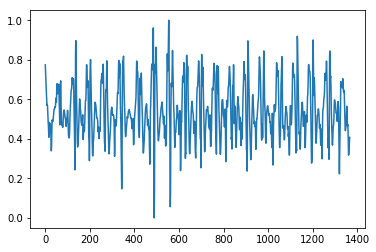

Scaling feature :  w3R
----------------------------
Before :


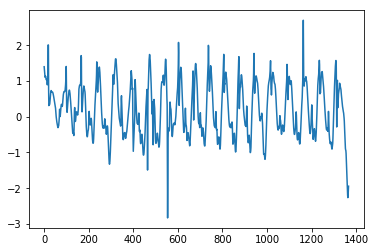

After :


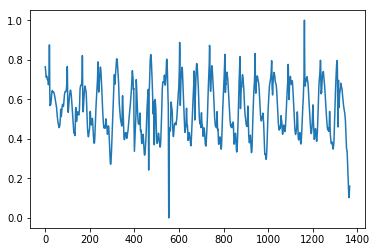

Scaling feature :  a1R
----------------------------
Before :


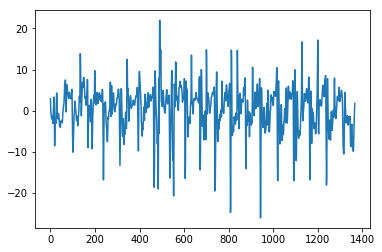

After :


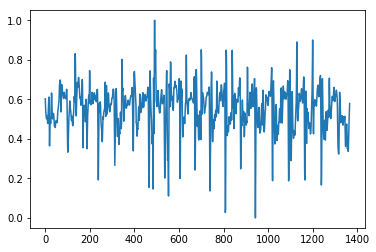

Scaling feature :  a2R
----------------------------
Before :


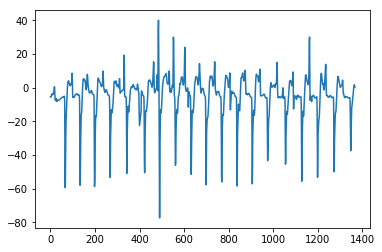

After :


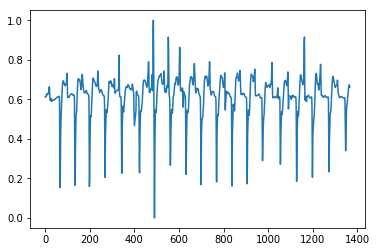

Scaling feature :  a3R
----------------------------
Before :


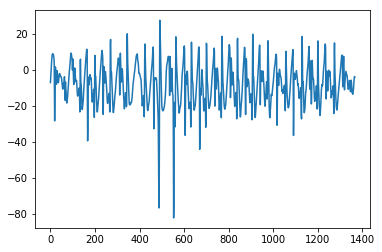

After :


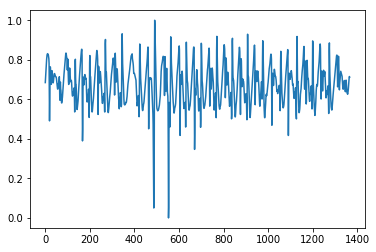

Scaling feature :  x
----------------------------
Before :


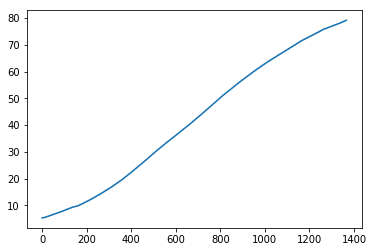

After :


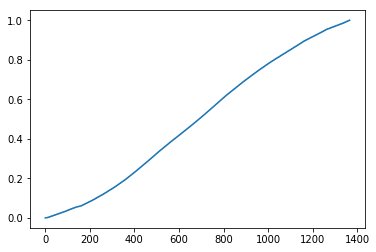

Scaling feature :  y
----------------------------
Before :


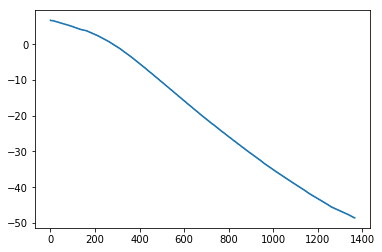

After :


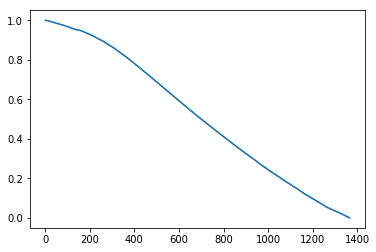

Scaling feature :  v
----------------------------
Before :


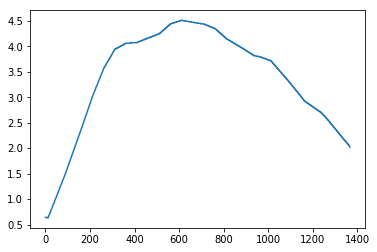

After :


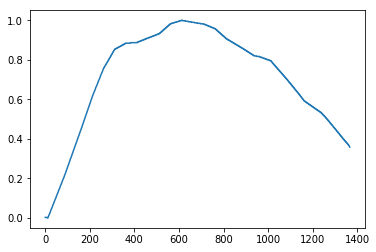

Scaling feature :  vdir
----------------------------
Before :


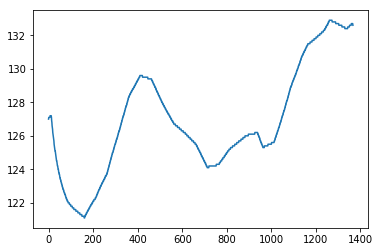

After :


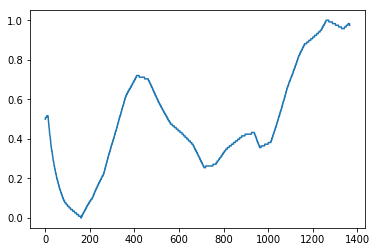

In [5]:
# Feature normalization
# Normalize Time Series Data
# Source : https://machinelearningmastery.com/normalize-standardize-time-series-data-python/

# Normalization is a rescaling of the data from the original range so that all values are within the range of 0 and 1.
# useful when your time series data has input values with differing scales.

for i in range(len(features)):
    feature = features[i];
    print('Scaling feature : ', features[i])
    print('----------------------------')
    print('Before :')
    values = df[feature].values.reshape(-1,1);
    values = values.astype('float32');
    pyplot.plot(values)
    pyplot.show();
    print('After :')
    scaler = MinMaxScaler(feature_range = (0,1));
    scaled_f = scaler.fit_transform(values);
    df[feature] = scaled_f;
    pyplot.plot(scaled_f)
    pyplot.show();


Histogram


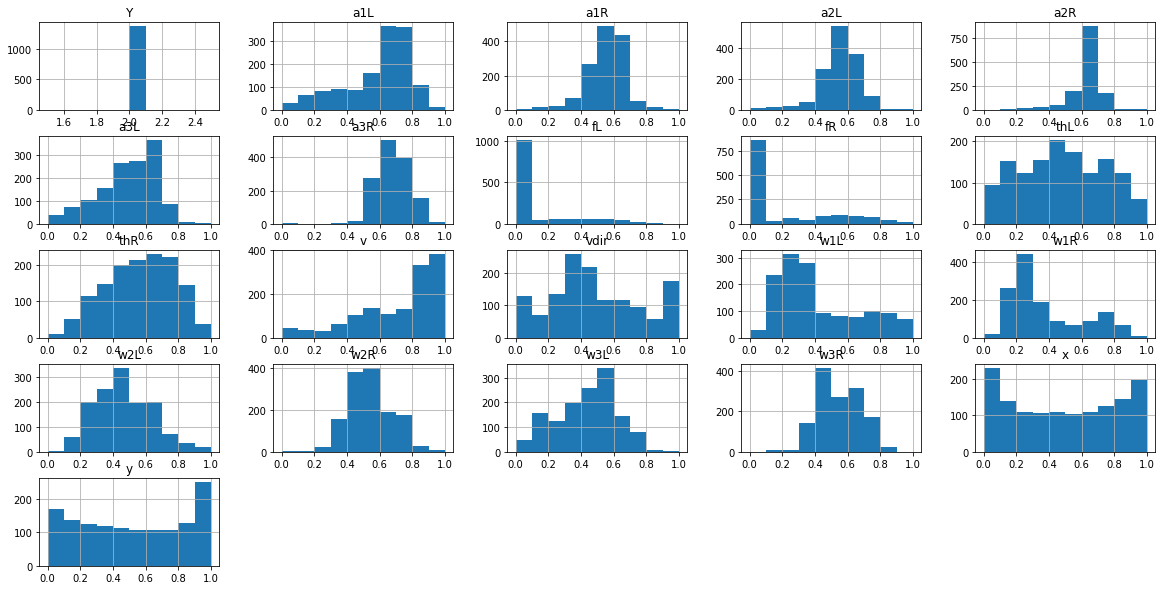

Plotting each feature(column)


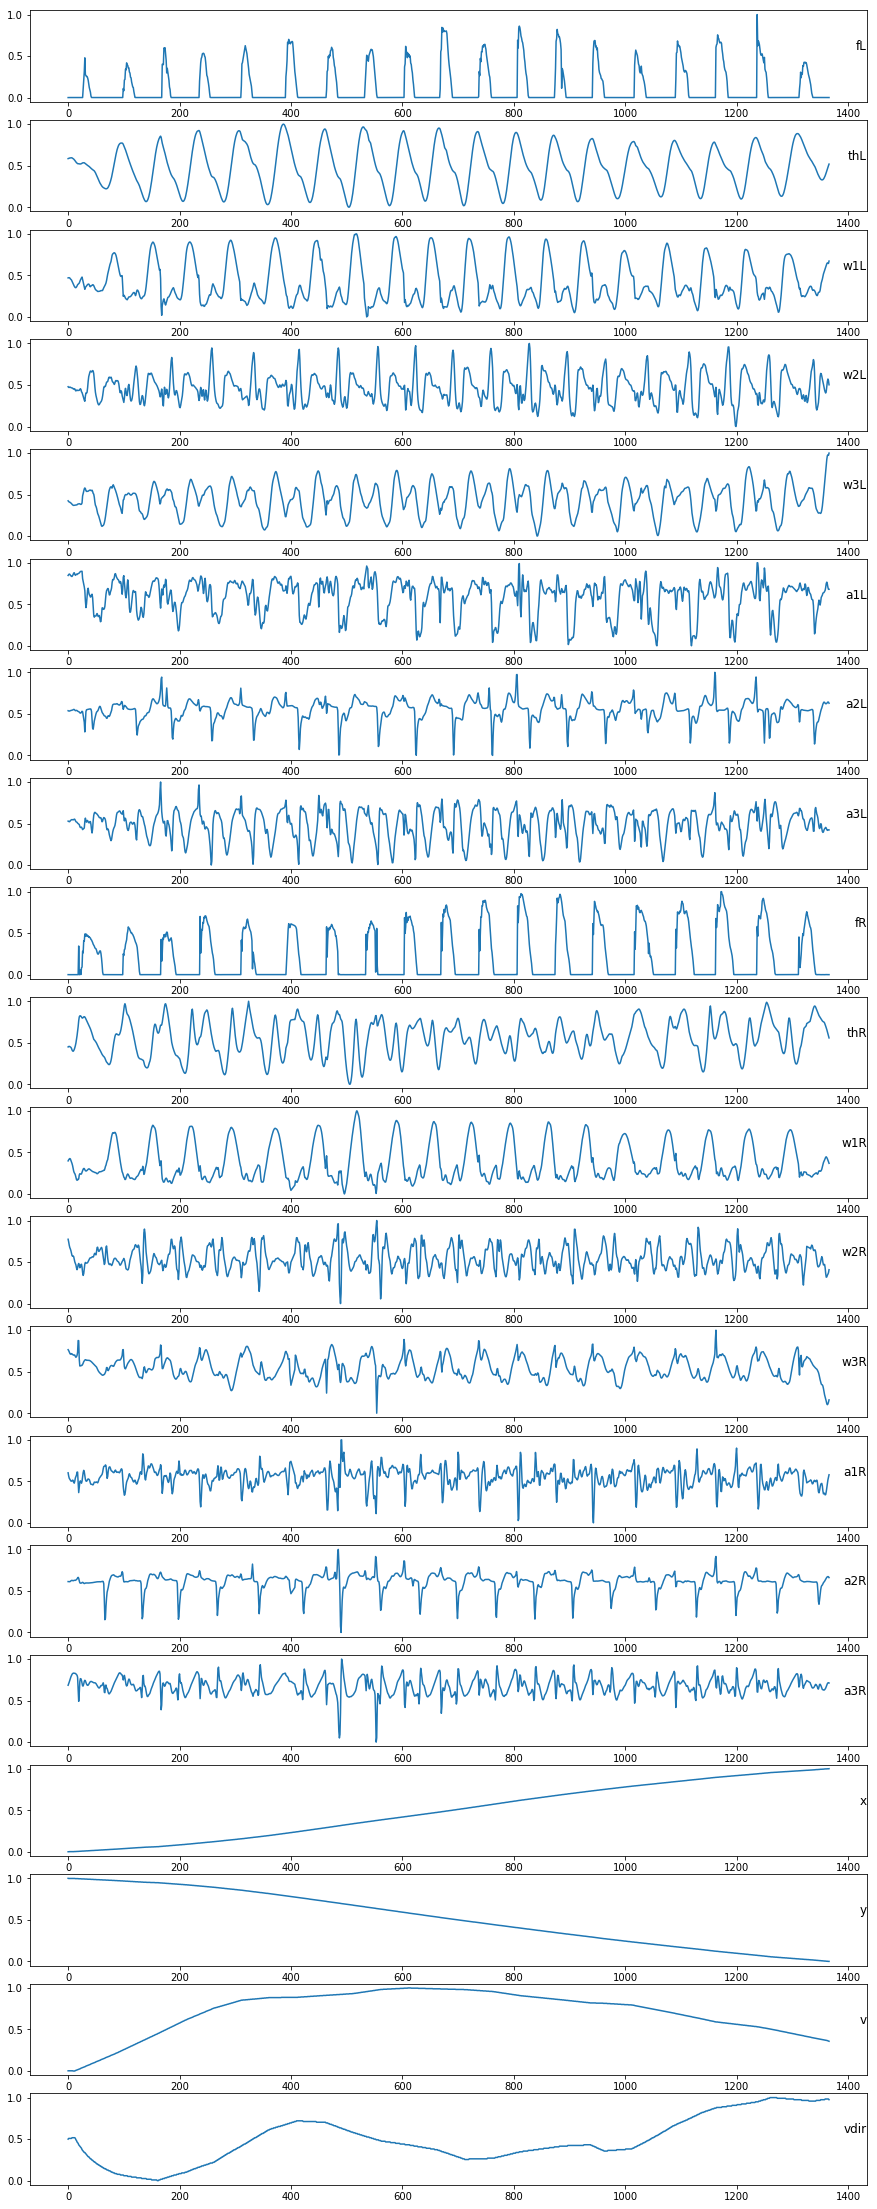

In [7]:
# Visulaization after normalization

# Histogram
print('Histogram');
# df = df.set_index(df['t']);
df.hist(figsize = (20,10));
pyplot.show()

# specify columns to plot
groups = [i for i in range(20)];
values = df.values;
i = 1
# plot each column
print('Plotting each feature(column)');
pyplot.figure(figsize = (15,40))
for group in groups:
	pyplot.subplot(len(groups), 1, i)
	pyplot.plot(values[:, group])
	pyplot.title(df.columns[group], y=0.5, loc='right')
	i += 1
pyplot.show();

In [8]:
# Combine X and corresponding Y data

X_data = df;
Y_data = Y;

join = df.join(Y);
print(join.head());

# Create train, test, validation data
# The fast and powerful methods that we rely on in machine learning, 
# such as using train-test splits and k-fold cross validation, do not work in the case of time series data. 
# This is because they ignore the temporal components inherent in the problem.

# Source : https://machinelearningmastery.com/backtest-machine-learning-models-time-series-forecasting/

# For time series data, the time dimension of observations means that we cannot randomly split them into groups. 
# Instead, we must split data up and respect the temporal order in which values were observed.
# In time series forecasting, this evaluation of models on historical data is called backtesting. 

join = df;
join_x = join.values
train_size = int(len(join_x) * 0.8)
train, test = join_x[0:train_size], join_x[train_size:len(join_x)]
print('Observations: %d' % (len(join_x)))
print('Training Observations: %d' % (len(train)))
print('Testing Observations: %d' % (len(test)))

trainX, trainY = train[:, 0:-1], train[:, -1];
testX, testY = test[:, 0:-1], test[:, -1];

print(trainX.shape);
print(trainY.shape);
print(testX.shape);
print(testY.shape);

timesteps = 1;
trainX = trainX.reshape(trainX.shape[0], timesteps, trainX.shape[1]);
testX = testX.reshape(testX.shape[0], timesteps, testX.shape[1]);

print(trainX.shape);
print(trainY.shape);
print(testX.shape);
print(testY.shape);

            fL       thL       w1L       w2L       w3L       a1L       a2L  \
t                                                                            
0.00  0.000450  0.585612  0.469388  0.478951  0.425259  0.846613  0.538141   
0.02  0.000901  0.588489  0.471379  0.470917  0.416514  0.856792  0.534776   
0.04  0.000450  0.591367  0.471545  0.470210  0.410820  0.863461  0.533654   
0.06  0.000901  0.592806  0.467729  0.474773  0.408786  0.861355  0.535577   
0.08  0.000901  0.594245  0.458105  0.472717  0.403905  0.849421  0.538942   

           a3L        fR       thR ...        w3R       a1R       a2R  \
t                                  ...                                  
0.00  0.529052  0.000519  0.449893 ...   0.764844  0.602540  0.612824   
0.02  0.525523  0.000000  0.455224 ...   0.754015  0.563814  0.612483   
0.04  0.521524  0.000000  0.456290 ...   0.738495  0.537372  0.612057   
0.06  0.523406  0.000000  0.454158 ...   0.722794  0.526546  0.611376   
0.08  0.534933 